<a href="https://colab.research.google.com/github/Stefan566/Fashion-Design/blob/master/Fashion_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


# Variables

In [0]:
img_rows = 28
img_cols = 28
img_channels = 1
img_shape = (img_rows, img_cols, img_channels)
latent_dim = 100
epochs = 100000
batch_size = 32

# Generator

In [0]:
def generator():

    model = Sequential()

    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(2048))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=(latent_dim,))
    img = model(noise)

    return Model(noise, img)


# Discriminator

In [0]:
def discriminator():

    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)


# Download and prepare the dataset

In [6]:
print('Download dataset')
(X_train, _), (_, _) = fashion_mnist.load_data()
X_train = X_train / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))


Download dataset
4423680/4422102 [==============================] - 1s 0us/step


# Compile the model

In [7]:
optimizer = Adam(0.0002, 0.5)

disc = discriminator()
disc.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

gen = generator()

z = Input(shape=(latent_dim,))
img = gen(z)

disc.trainable = False

validity = disc(img)

combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)           

# Train

In [9]:
for epoch in range(epochs):

    if epoch % 1000 == 0:
      print('Epoch: ', epoch) 
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    gen_imgs = gen.predict(noise)

    d_loss_real = disc.train_on_batch(imgs, valid)
    d_loss_fake = disc.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    g_loss = combined.train_on_batch(noise, valid)


Epoch:  0


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch:  1000
Epoch:  2000
Epoch:  3000
Epoch:  4000
Epoch:  5000
Epoch:  6000
Epoch:  7000
Epoch:  8000
Epoch:  9000
Epoch:  10000
Epoch:  11000
Epoch:  12000
Epoch:  13000
Epoch:  14000
Epoch:  15000
Epoch:  16000
Epoch:  17000
Epoch:  18000
Epoch:  19000
Epoch:  20000
Epoch:  21000
Epoch:  22000
Epoch:  23000
Epoch:  24000
Epoch:  25000
Epoch:  26000
Epoch:  27000
Epoch:  28000
Epoch:  29000
Epoch:  30000
Epoch:  31000
Epoch:  32000
Epoch:  33000
Epoch:  34000
Epoch:  35000
Epoch:  36000
Epoch:  37000
Epoch:  38000
Epoch:  39000
Epoch:  40000
Epoch:  41000
Epoch:  42000
Epoch:  43000
Epoch:  44000
Epoch:  45000
Epoch:  46000
Epoch:  47000
Epoch:  48000
Epoch:  49000
Epoch:  50000
Epoch:  51000
Epoch:  52000
Epoch:  53000
Epoch:  54000
Epoch:  55000
Epoch:  56000
Epoch:  57000
Epoch:  58000
Epoch:  59000
Epoch:  60000
Epoch:  61000
Epoch:  62000
Epoch:  63000
Epoch:  64000
Epoch:  65000
Epoch:  66000
Epoch:  67000
Epoch:  68000
Epoch:  69000
Epoch:  70000
Epoch:  71000
Epoch:  72000
E

# Fianally generate pictures

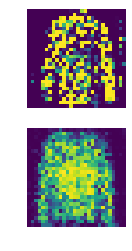

In [10]:
noise = np.random.normal(0, 1, (2, latent_dim))
gen_imgs = gen.predict(noise)

gen_imgs = 0.5 * gen_imgs + 0.5

fig, axs = plt.subplots(2)
cnt = 0
for i in range(0,2):
    axs[i].imshow(gen_imgs[cnt, :,:,0]) # cmap ='gray'
    axs[i].axis('off')
    cnt += 1

plt.show()
plt.close()